In [1]:
from google.colab import files
files.upload()

Saving 482792_901570_bundle_archive.zip to 482792_901570_bundle_archive.zip


In [2]:
!unzip 482792_901570_bundle_archive

Archive:  482792_901570_bundle_archive.zip
  inflating: dataset/alien_test/Cloud_1.png  
  inflating: dataset/alien_test/Cloud_2.jpg  
  inflating: dataset/alien_test/Cloud_3.jpeg  
  inflating: dataset/alien_test/Cloud_4.jpg  
  inflating: dataset/alien_test/foggy_1.jpg  
  inflating: dataset/alien_test/foggy_10.jpg  
  inflating: dataset/alien_test/foggy_2.jpg  
  inflating: dataset/alien_test/foggy_3.jpg  
  inflating: dataset/alien_test/foggy_4.jpg  
  inflating: dataset/alien_test/foggy_5.jpg  
  inflating: dataset/alien_test/foggy_6.jpg  
  inflating: dataset/alien_test/foggy_7.jpg  
  inflating: dataset/alien_test/foggy_8.jpg  
  inflating: dataset/alien_test/foggy_9.jpg  
  inflating: dataset/alien_test/rain_1.jpg  
  inflating: dataset/alien_test/rain_2.png  
  inflating: dataset/alien_test/rain_3.jpg  
  inflating: dataset/alien_test/rain_4.jpg  
  inflating: dataset/alien_test/rain_5.jpg  
  inflating: dataset/alien_test/rain_6.jpg  
  inflating: dataset/alien_test/shine_1.j

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


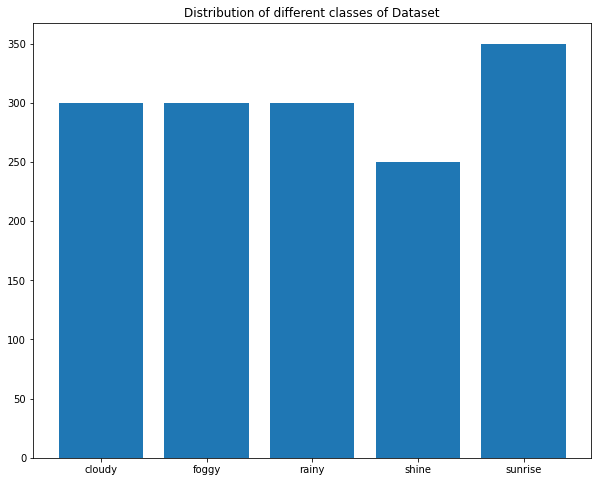

In [3]:
import os
import random
from shutil import copyfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib
image_folder = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/dataset/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(10, 8))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes of Dataset')
plt.show()

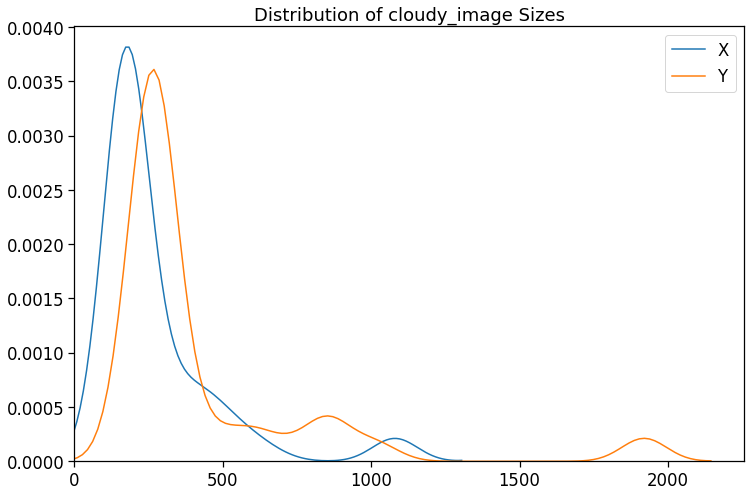

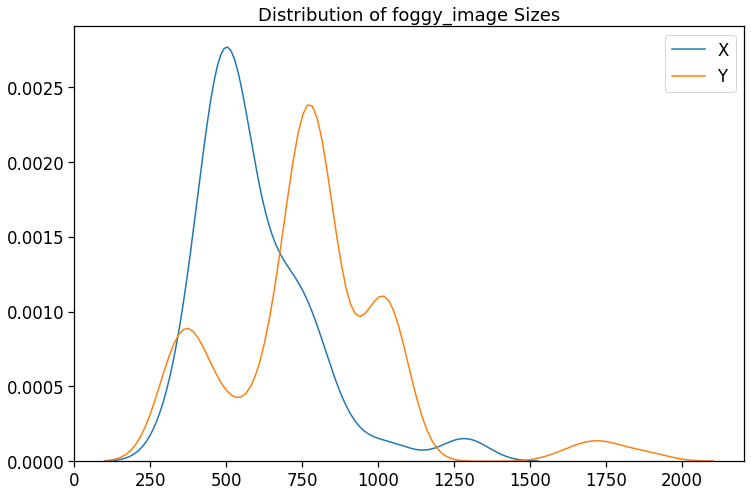

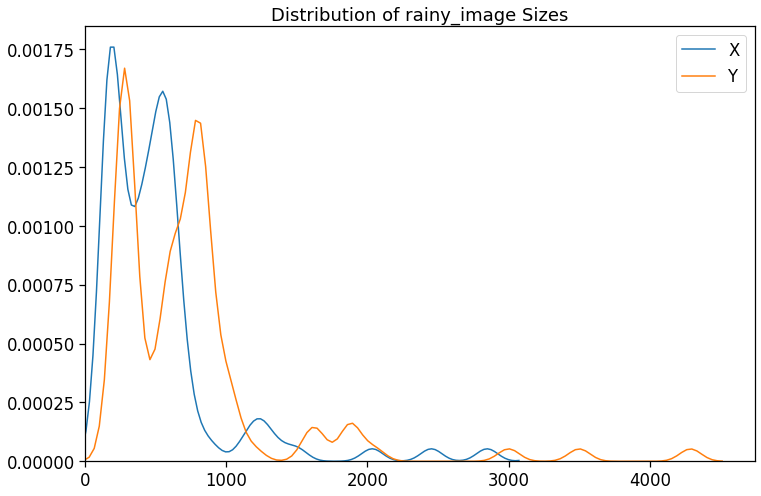

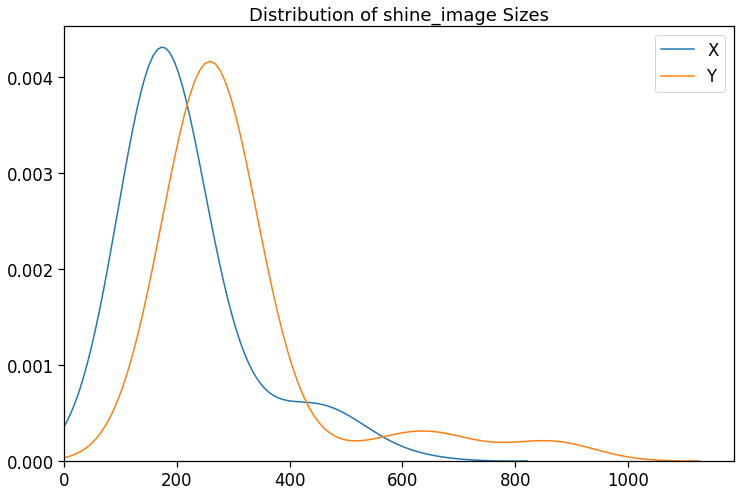

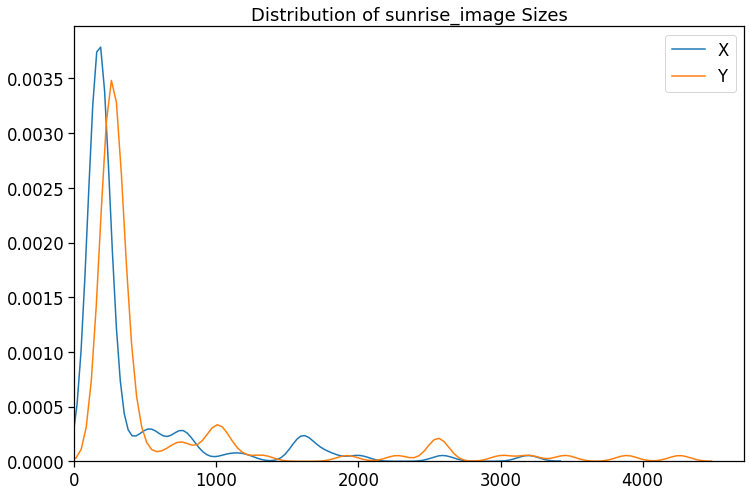

In [4]:
image_folder = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']

for i in image_folder:
    sample_images = list(pathlib.Path('/content/dataset/'+i+'/').rglob('*/'))
    np.random.seed(42)
    rand_imgs = np.random.choice(sample_images, size=10*10)

    shapes = []
    for img in rand_imgs:
        shapes.append(imread(str(img)).shape)
    
    shapes = pd.DataFrame().assign(X=pd.Series(shapes).map(lambda s: s[0]), Y=pd.Series(shapes).map(lambda s: s[1]))
    
    plt.figure(figsize=(12, 8))
    sns.set_context("notebook", font_scale=1.5)
    sns.kdeplot(shapes['X'], bw=75)
    sns.kdeplot(shapes['Y'], bw=75)
    plt.title('Distribution of {}_image Sizes'.format(i))
    ax = plt.gca()
    ax.set_xlim(0, ax.get_xlim()[1])

In [6]:
try:
    os.mkdir('/content/weather_pred/Data')
    os.mkdir('/content/weather_pred/Data/training')
    os.mkdir('/content/weather_pred/Data/validation')
    os.mkdir('/content/weather_pred/Data/training/cloudy')
    os.mkdir('/content/weather_pred/Data/training/foggy')
    os.mkdir('/content/weather_pred/Data/training/rainy')
    os.mkdir('/content/weather_pred/Data/training/shine')
    os.mkdir('/content/weather_pred/Data/training/sunrise')
    os.mkdir('/content/weather_pred/Data/validation/cloudy')
    os.mkdir('/content/weather_pred/Data/validation/foggy')
    os.mkdir('/content/weather_pred/Data/validation/rainy')
    os.mkdir('/content/weather_pred/Data/validation/shine')
    os.mkdir('/content/weather_pred/Data/validation/sunrise')
except OSError:
    print("pppp")#pass

In [7]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

In [8]:
CLOUDY_SOURCE_DIR = '/content/dataset/cloudy/'
TRAINING_CLOUDY_DIR = '/content/weather_pred/Data/training/cloudy/' #/content/dataset/cloudy/cloudy163.jpg
VALID_CLOUDY_DIR = '/content//weather_pred/Data/validation/cloudy/'

FOGGY_SOURCE_DIR = '/content/dataset/foggy/'
TRAINING_FOGGY_DIR = '/content/weather_pred/Data/training/foggy/'
VALID_FOGGY_DIR = '/content/weather_pred/Data/validation/foggy/'

RAINY_SOURCE_DIR = '/content/dataset/rainy/'
TRAINING_RAINY_DIR = '/content/weather_pred/Data/training/rainy/'
VALID_RAINY_DIR = '/content/weather_pred/Data/validation/rainy/'

SHINE_SOURCE_DIR = '/content/dataset/shine/'
TRAINING_SHINE_DIR = '/content/weather_pred/Data/training/shine/'
VALID_SHINE_DIR = '/content/weather_pred/Data/validation/shine/'

SUNRISE_SOURCE_DIR = '/content/dataset/sunrise/'
TRAINING_SUNRISE_DIR = '/content/weather_pred/Data/training/sunrise/'
VALID_SUNRISE_DIR = '/content/weather_pred/Data/validation/sunrise/'

In [9]:
split_size = .85
split_data(CLOUDY_SOURCE_DIR, TRAINING_CLOUDY_DIR, VALID_CLOUDY_DIR, split_size)
split_data(FOGGY_SOURCE_DIR, TRAINING_FOGGY_DIR, VALID_FOGGY_DIR, split_size)
split_data(RAINY_SOURCE_DIR, TRAINING_RAINY_DIR, VALID_RAINY_DIR, split_size)
split_data(SHINE_SOURCE_DIR, TRAINING_SHINE_DIR, VALID_SHINE_DIR, split_size)
split_data(SUNRISE_SOURCE_DIR, TRAINING_SUNRISE_DIR, VALID_SUNRISE_DIR, split_size)

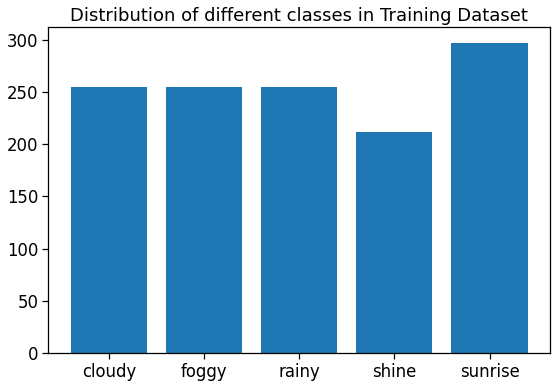

In [10]:
image_folder = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/weather_pred/Data/training/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [11]:
for i in ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']:
    print('Training {} images are: '.format(i)+str(len(os.listdir('/content/weather_pred/Data/training/'+i+'/'))))

Training cloudy images are: 255
Training foggy images are: 255
Training rainy images are: 255
Training shine images are: 212
Training sunrise images are: 297


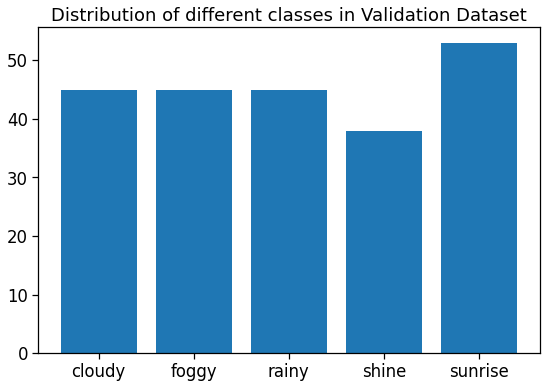

In [12]:
image_folder = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/weather_pred/Data/validation/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()

In [13]:
for i in ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']:
    print('Valid {} images are: '.format(i)+str(len(os.listdir('/content/weather_pred/Data/validation/'+i+'/'))))

Valid cloudy images are: 45
Valid foggy images are: 45
Valid rainy images are: 45
Valid shine images are: 38
Valid sunrise images are: 53


In [14]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Model
from keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input

In [15]:
img_width=256; img_height=256
batch_size=8

TRAINING_DIR = '/content/weather_pred/Data/training/'

In [16]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True
                                   )

In [17]:
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 1274 images belonging to 5 classes.


In [18]:

VALIDATION_DIR = '/content/weather_pred/Data/validation/'

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [19]:
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 226 images belonging to 5 classes.


In [20]:
import keras
from keras.models import Sequential
base_model_VGG19 = VGG19(include_top=False, weights='imagenet',
                         input_tensor=None, input_shape=(img_height, img_width, 3))
# VGG19(include_top=False, weights=wp,
#                   input_tensor=None, input_shape=(img_height, img_width, 3))
base_model_VGG19.trainable=False
#Adding the final layers to the above base models where the actual classification is done in the dense layers
model_vgg19 = Sequential()
model_vgg19.add(base_model_VGG19) 
model_vgg19.add(Flatten()) 
model_vgg19.add(Dense(1024,activation=('relu'),input_dim=512))
model_vgg19.add(Dropout(.15))
model_vgg19.add(Dense(512,activation=('relu'))) 
model_vgg19.add(Dropout(.2))
model_vgg19.add(Dense(256,activation=('relu'))) 
model_vgg19.add(Dropout(.2))
model_vgg19.add(Dense(128,activation=('relu')))
model_vgg19.add(Dropout(.2))
model_vgg19.add(Dense(5,activation=('softmax')))

#VGG19 Model Summary
model_vgg19.summary()

80142336/80134624 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 8, 8, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              33555456  
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________

In [21]:
model_vgg19.compile(optimizer='Adam', loss='categorical_crossentropy', metrics =['accuracy'])

In [22]:
history = model_vgg19.fit(train_generator,
                    epochs=30,verbose=1,
                    shuffle = True,validation_data=validation_generator)

Epoch 1/30
160/160 [==============================] - 31s 192ms/step - loss: 6.2273 - accuracy: 0.5895 - val_loss: 0.5535 - val_accuracy: 0.8628
Epoch 2/30
160/160 [==============================] - 31s 191ms/step - loss: 1.2521 - accuracy: 0.7849 - val_loss: 0.5154 - val_accuracy: 0.8894
Epoch 3/30
160/160 [==============================] - 31s 192ms/step - loss: 0.6585 - accuracy: 0.8595 - val_loss: 0.6632 - val_accuracy: 0.8717
Epoch 4/30
160/160 [==============================] - 31s 193ms/step - loss: 0.6663 - accuracy: 0.8548 - val_loss: 0.2893 - val_accuracy: 0.9381
Epoch 5/30
160/160 [==============================] - 31s 195ms/step - loss: 0.5420 - accuracy: 0.8768 - val_loss: 0.2261 - val_accuracy: 0.9469
Epoch 6/30
160/160 [==============================] - 31s 195ms/step - loss: 0.3443 - accuracy: 0.9050 - val_loss: 0.3517 - val_accuracy: 0.9292
Epoch 7/30
160/160 [==============================] - 31s 194ms/step - loss: 0.3407 - accuracy: 0.9121 - val_loss: 0.4209 - val_ac

In [46]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

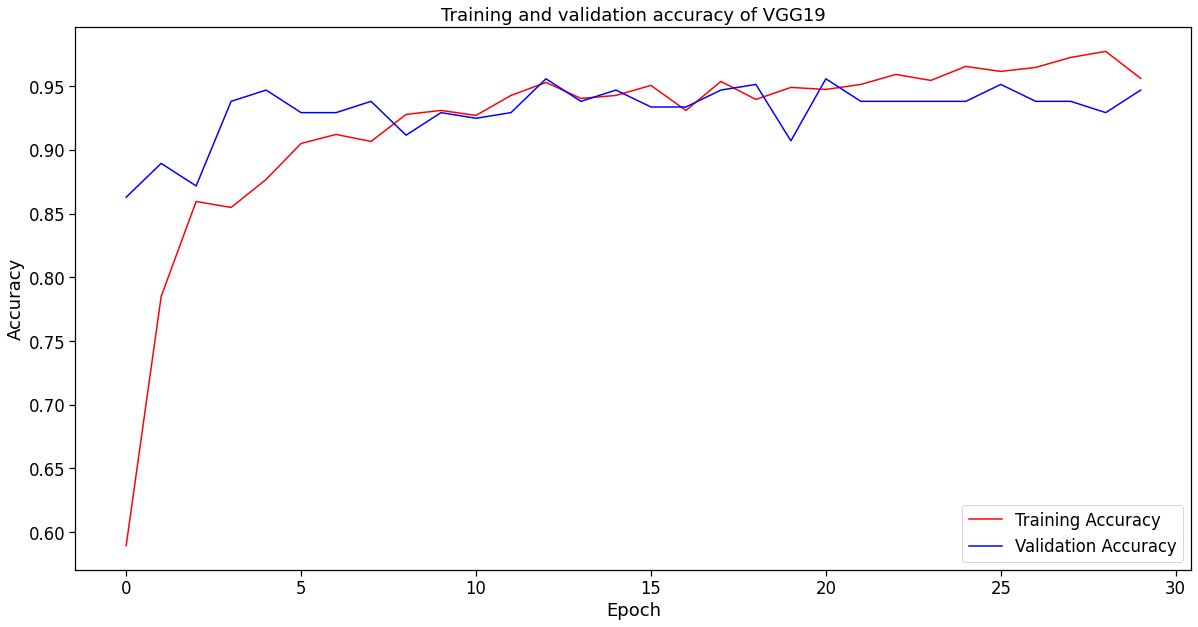

In [47]:
fig = plt.figure(figsize=(20,10))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy of VGG19')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss of VGG19')

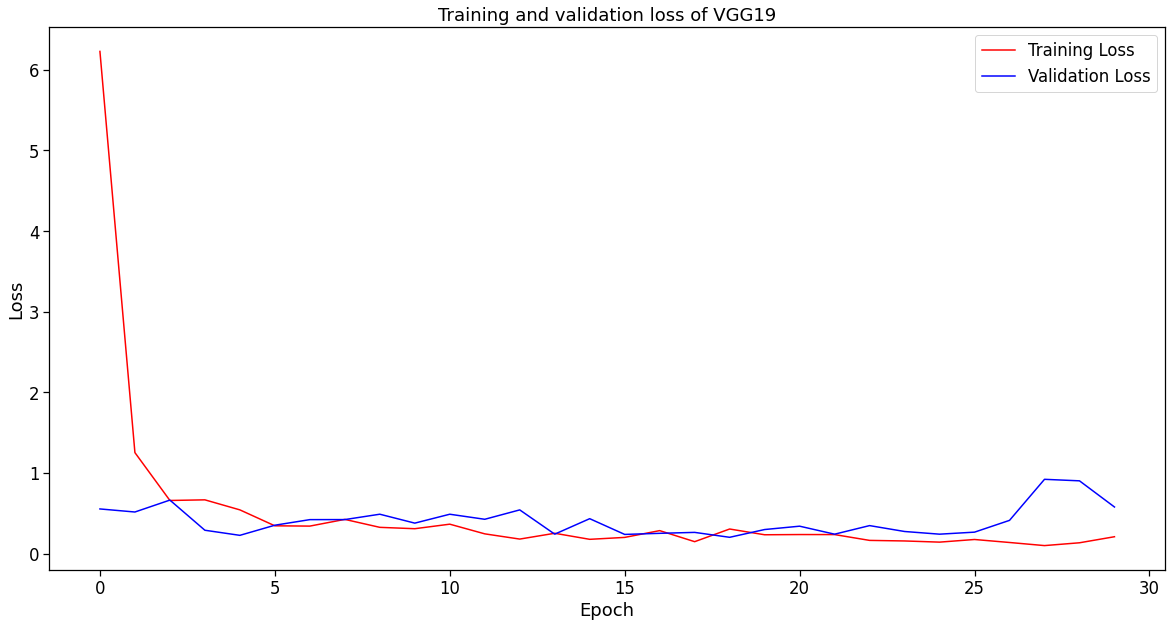

In [48]:
fig2 = plt.figure(figsize=(20,10))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss of VGG19')

In [35]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline
def test(uploaded):
  for fn in uploaded.keys():
    # predicting images
    path = '/content/' + fn
    img_pred= image.load_img(path, target_size=(256,256))
    imshow(img_pred)
    img_pred=image.img_to_array(img_pred)
    img_pred=np.expand_dims(img_pred,axis=0)
    rslt=model_vgg19.predict(img_pred)
  print(rslt)
  max=rslt[0][0]
  for i in range(0,len(rslt[0])):
    if rslt[0][i]>max:
      max=rslt[0][i]
  print(max)
  if(max==rslt[0][0]):
    s=image_folder[0]
  elif(max==rslt[0][1]):
    s=image_folder[1]
  elif(max==rslt[0][2]):
    s=image_folder[2]
  elif(max==rslt[0][3]):
    s=image_folder[3]
  elif(max==rslt[0][4]):
    s=image_folder[4]
  print("predicted weather is "+s)

Saving cloud.jpg to cloud (1).jpg
[[9.9949932e-01 1.7044563e-07 3.0131713e-07 4.9919804e-04 1.0269937e-06]]
0.9994993
predicted weather is cloudy


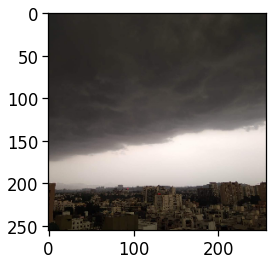

In [36]:
from google.colab import files
uploaded = files.upload()
test(uploaded)

Saving fog.jpg to fog (2).jpg
[[1.9506329e-05 9.4407952e-01 5.5886202e-02 1.4757552e-05 1.1056468e-07]]
0.9440795
predicted weather is foggy


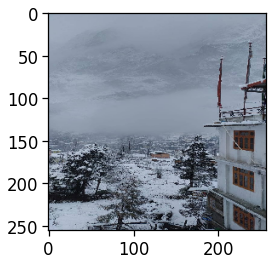

In [37]:
from google.colab import files
uploaded = files.upload()
test(uploaded)

Saving image1.jpg to image1 (1).jpg
[[0. 0. 1. 0. 0.]]
1.0
predicted weather is rainy


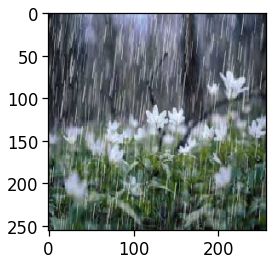

In [38]:
from google.colab import files
uploaded = files.upload()
test(uploaded)

Saving image5.jpg to image5 (2).jpg
[[1.9234083e-06 1.9385987e-10 1.8372567e-10 3.2104348e-05 9.9996603e-01]]
0.999966
predicted weather is sunrise


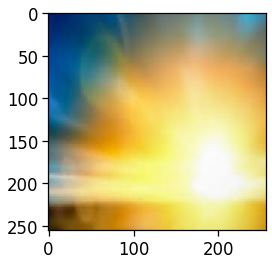

In [45]:
from google.colab import files
uploaded = files.upload()
test(uploaded)